In [3]:
import math
import time
import pandas as pd
import matplotlib.pyplot as plt
import play as lib
from binance.client import Client

## Fetch data

In [4]:
client = lib.get_client()
ONE_HOUR_IN_MS=60 * 60 * 1000
ONE_DAY_IN_MS=24 * ONE_HOUR_IN_MS
ONE_MONTH_IN_MS=30 * ONE_DAY_IN_MS

PAIR_DIC = {
  "MATIC": ["MATICUSDT", './out/pair_MATICUSDT.pkl'],
  "BNB": ["BNBUSDT", './out/pair_BNBUSDT.pkl'],
  "AVAX": ["AVAXUSDT", './out/AVAXUSDT.pkl']
}

In [5]:
def pull_data(PAIR_NAME: str, DATA_FILE: str):
  now = math.floor(time.time() * 1000)
  df = lib.fetch_price(client, PAIR_NAME, now - 3 * ONE_MONTH_IN_MS, now, Client.KLINE_INTERVAL_1HOUR)
  print(df)
  print(df.describe())
  f = plt.figure()
  f.set_figwidth(24)
  plt.plot(df["close_time"], df["close_price"])
  df.to_pickle(DATA_FILE)
  print("Saved to: ", DATA_FILE)


### MATIC

                  close_time  close_price
0    2022-10-28 11:59:59.999       0.9063
1    2022-10-28 12:59:59.999       0.9118
2    2022-10-28 13:59:59.999       0.9254
3    2022-10-28 14:59:59.999       0.9285
4    2022-10-28 15:59:59.999       0.9292
...                      ...          ...
2155 2023-01-26 06:59:59.999       1.0014
2156 2023-01-26 07:59:59.999       0.9947
2157 2023-01-26 08:59:59.999       0.9993
2158 2023-01-26 09:59:59.999       0.9995
2159 2023-01-26 10:59:59.999       0.9948

[2160 rows x 2 columns]
       close_price
count  2160.000000
mean      0.896664
std       0.099068
min       0.748400
25%       0.809050
50%       0.890050
75%       0.939525
max       1.273200
Saved to:  ./out/pair_MATICUSDT.pkl


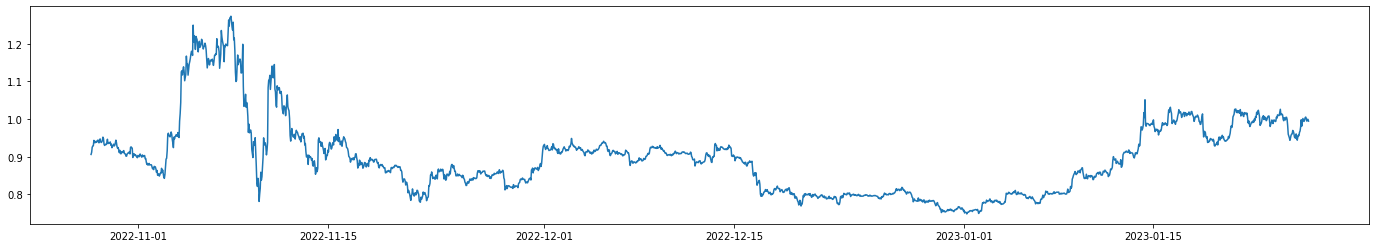

In [6]:
pull_data(PAIR_DIC["MATIC"][0], PAIR_DIC["MATIC"][1])

### BNB

                  close_time  close_price
0    2022-10-28 11:59:59.999        287.8
1    2022-10-28 12:59:59.999        289.6
2    2022-10-28 13:59:59.999        292.7
3    2022-10-28 14:59:59.999        293.9
4    2022-10-28 15:59:59.999        296.8
...                      ...          ...
2155 2023-01-26 06:59:59.999        307.9
2156 2023-01-26 07:59:59.999        305.9
2157 2023-01-26 08:59:59.999        305.0
2158 2023-01-26 09:59:59.999        304.5
2159 2023-01-26 10:59:59.999        303.7

[2160 rows x 2 columns]
       close_price
count  2160.000000
mean    282.796759
std      27.847524
min     225.400000
25%     258.875000
50%     286.000000
75%     300.800000
max     375.400000
Saved to:  ./out/pair_BNBUSDT.pkl


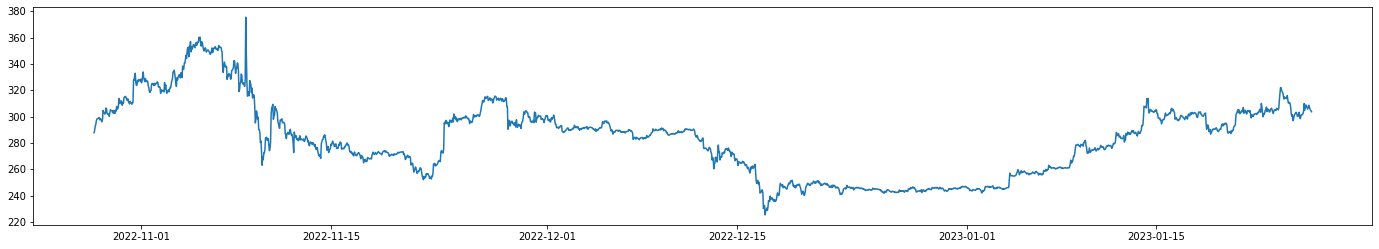

In [7]:
pull_data(PAIR_DIC["BNB"][0], PAIR_DIC["BNB"][1])

                  close_time  close_price
0    2022-10-28 11:59:59.999        17.27
1    2022-10-28 12:59:59.999        17.37
2    2022-10-28 13:59:59.999        17.55
3    2022-10-28 14:59:59.999        17.63
4    2022-10-28 15:59:59.999        17.60
...                      ...          ...
2155 2023-01-26 06:59:59.999        18.30
2156 2023-01-26 07:59:59.999        18.08
2157 2023-01-26 08:59:59.999        18.09
2158 2023-01-26 09:59:59.999        18.01
2159 2023-01-26 10:59:59.999        17.88

[2160 rows x 2 columns]
       close_price
count  2160.000000
mean     14.026347
std       2.496038
min      10.670000
25%      11.950000
50%      13.160000
75%      16.080000
max      20.260000
Saved to:  ./out/AVAXUSDT.pkl


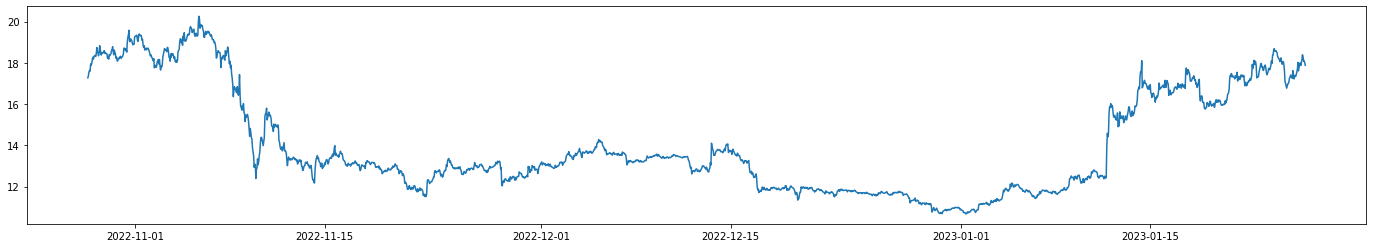

In [8]:
pull_data(PAIR_DIC["AVAX"][0], PAIR_DIC["AVAX"][1])

# Prophet

In [9]:
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot


/Users/admin/Documents/projects/_research/Learning/python3_playground/mp_env/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
def prophet_model(data_path: str):
  print("DATA_SOURCE", data_path)
  df = pd.read_pickle(data_path)
  df = df.rename(columns={"close_time": "ds", "close_price": "y"})
  m = Prophet()
  m.fit(df)

  future = m.make_future_dataframe(periods=5)
  print(future.tail())
  forecast = m.predict(future)
  print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

  fig1 = m.plot(forecast)
  fig1.set_figwidth(24)

  fig2 = m.plot_components(forecast)
  fig2.set_figwidth(24)

  fig = m.plot(forecast)
  fig.set_figwidth(24)
  a = add_changepoints_to_plot(fig.gca(), m, forecast)

  return m,future,forecast
  

DATA_SOURCE ./out/pair_MATICUSDT.pkl


17:16:34 - cmdstanpy - INFO - Chain [1] start processing
17:16:36 - cmdstanpy - INFO - Chain [1] done processing


                          ds
2160 2023-01-27 10:59:59.999
2161 2023-01-28 10:59:59.999
2162 2023-01-29 10:59:59.999
2163 2023-01-30 10:59:59.999
2164 2023-01-31 10:59:59.999
                          ds      yhat  yhat_lower  yhat_upper
2160 2023-01-27 10:59:59.999  1.072735    1.021857    1.124309
2161 2023-01-28 10:59:59.999  1.083634    1.030414    1.133207
2162 2023-01-29 10:59:59.999  1.083210    1.028443    1.137833
2163 2023-01-30 10:59:59.999  1.095021    1.027622    1.156576
2164 2023-01-31 10:59:59.999  1.109037    1.028977    1.178160


(<prophet.forecaster.Prophet at 0x121695f40>,
                           ds
 0    2022-10-28 11:59:59.999
 1    2022-10-28 12:59:59.999
 2    2022-10-28 13:59:59.999
 3    2022-10-28 14:59:59.999
 4    2022-10-28 15:59:59.999
 ...                      ...
 2160 2023-01-27 10:59:59.999
 2161 2023-01-28 10:59:59.999
 2162 2023-01-29 10:59:59.999
 2163 2023-01-30 10:59:59.999
 2164 2023-01-31 10:59:59.999
 
 [2165 rows x 1 columns],
                           ds     trend  yhat_lower  yhat_upper  trend_lower  \
 0    2022-10-28 11:59:59.999  0.897853    0.858554    0.959589     0.897853   
 1    2022-10-28 12:59:59.999  0.897944    0.861774    0.961603     0.897944   
 2    2022-10-28 13:59:59.999  0.898035    0.862284    0.959961     0.898035   
 3    2022-10-28 14:59:59.999  0.898125    0.862012    0.964907     0.898125   
 4    2022-10-28 15:59:59.999  0.898216    0.862507    0.964822     0.898216   
 ...                      ...       ...         ...         ...          ...   
 2160 

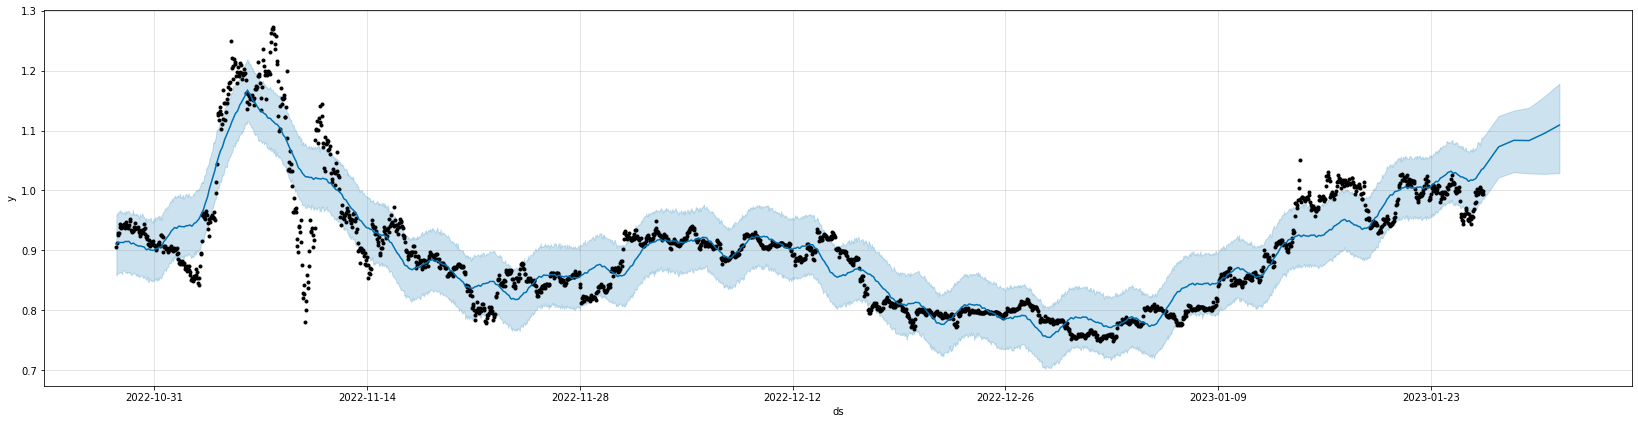

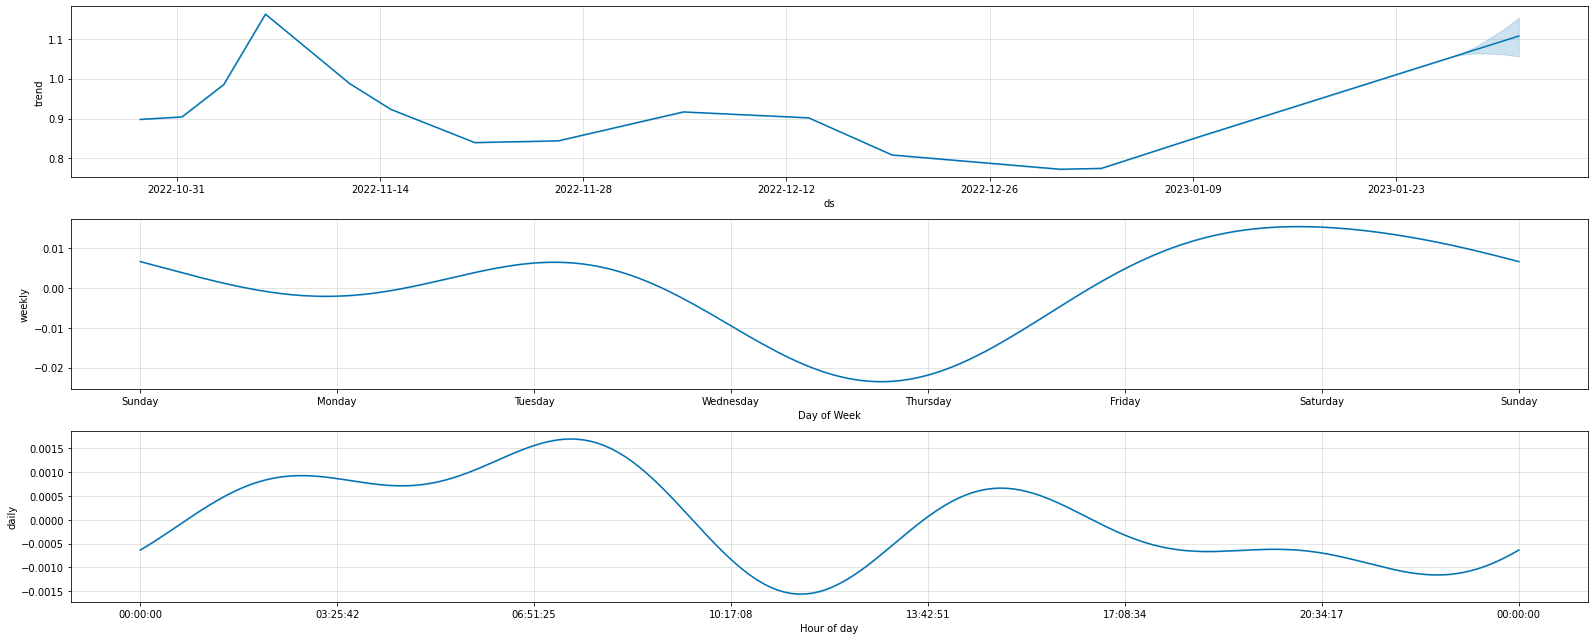

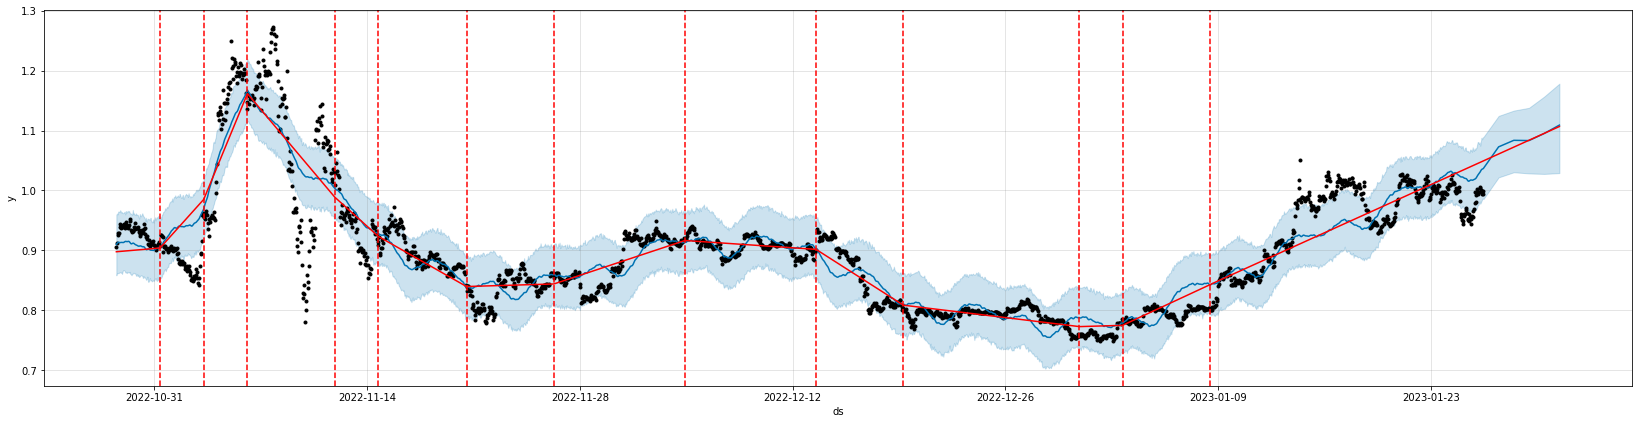

In [11]:
prophet_model(PAIR_DIC["MATIC"][1])

17:16:38 - cmdstanpy - INFO - Chain [1] start processing


DATA_SOURCE ./out/pair_BNBUSDT.pkl


17:16:39 - cmdstanpy - INFO - Chain [1] done processing


                          ds
2160 2023-01-27 10:59:59.999
2161 2023-01-28 10:59:59.999
2162 2023-01-29 10:59:59.999
2163 2023-01-30 10:59:59.999
2164 2023-01-31 10:59:59.999
                          ds        yhat  yhat_lower  yhat_upper
2160 2023-01-27 10:59:59.999  316.722195  308.259046  325.808326
2161 2023-01-28 10:59:59.999  319.202268  310.040279  328.234695
2162 2023-01-29 10:59:59.999  322.783524  312.240824  334.787394
2163 2023-01-30 10:59:59.999  323.062939  309.398527  336.292497
2164 2023-01-31 10:59:59.999  325.288968  307.642155  342.585982


(<prophet.forecaster.Prophet at 0x1224c5160>,
                           ds
 0    2022-10-28 11:59:59.999
 1    2022-10-28 12:59:59.999
 2    2022-10-28 13:59:59.999
 3    2022-10-28 14:59:59.999
 4    2022-10-28 15:59:59.999
 ...                      ...
 2160 2023-01-27 10:59:59.999
 2161 2023-01-28 10:59:59.999
 2162 2023-01-29 10:59:59.999
 2163 2023-01-30 10:59:59.999
 2164 2023-01-31 10:59:59.999
 
 [2165 rows x 1 columns],
                           ds       trend  yhat_lower  yhat_upper  trend_lower  \
 0    2022-10-28 11:59:59.999  296.959795  288.582427  306.268727   296.959795   
 1    2022-10-28 12:59:59.999  297.223030  288.518189  306.006852   297.223030   
 2    2022-10-28 13:59:59.999  297.486266  288.780839  306.353015   297.486266   
 3    2022-10-28 14:59:59.999  297.749501  289.278365  306.726473   297.749501   
 4    2022-10-28 15:59:59.999  298.012737  289.029900  307.939694   298.012737   
 ...                      ...         ...         ...         ...         

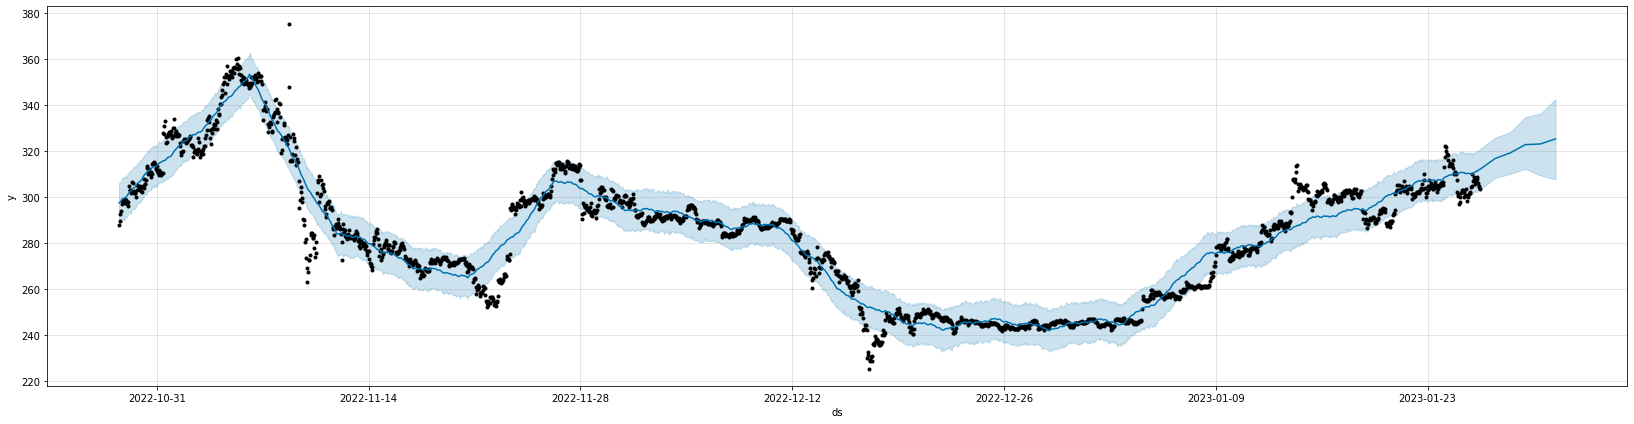

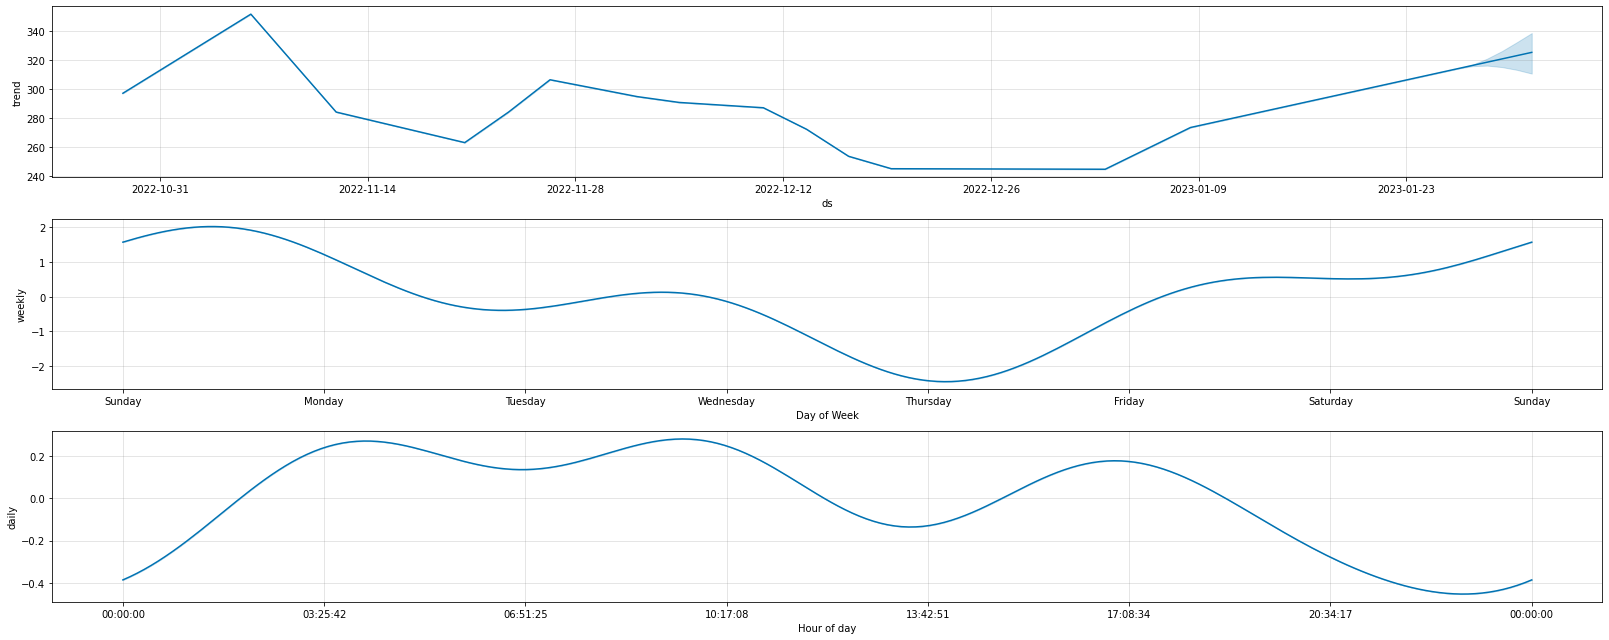

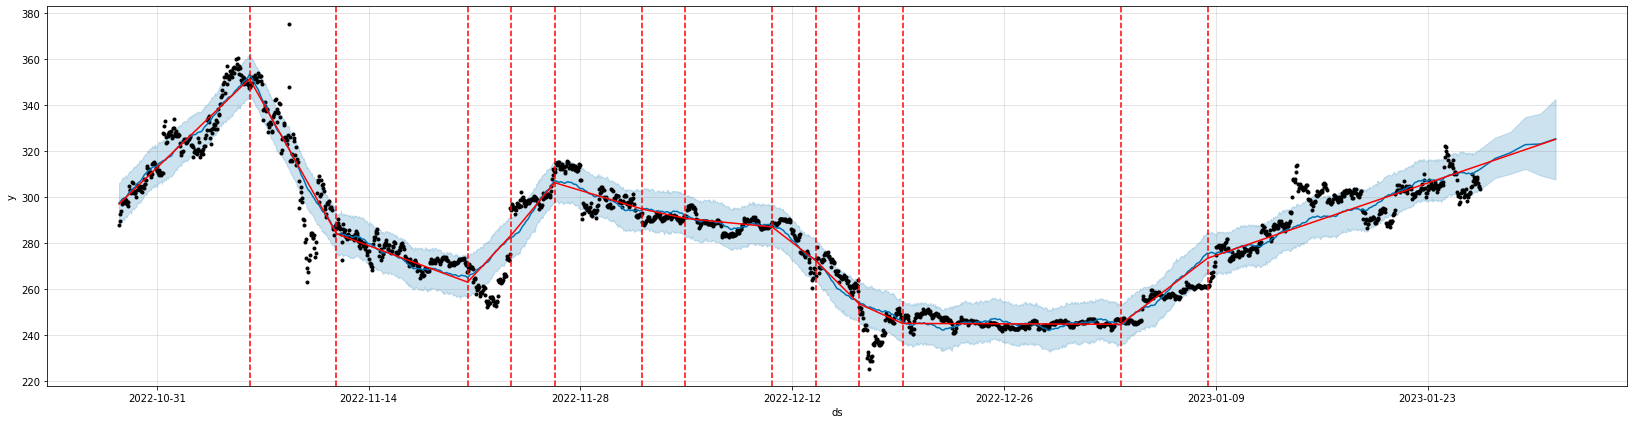

In [12]:
prophet_model(PAIR_DIC["BNB"][1])

17:17:03 - cmdstanpy - INFO - Chain [1] start processing


DATA_SOURCE ./out/AVAXUSDT.pkl


17:17:03 - cmdstanpy - INFO - Chain [1] done processing


                          ds
2160 2023-01-27 10:59:59.999
2161 2023-01-28 10:59:59.999
2162 2023-01-29 10:59:59.999
2163 2023-01-30 10:59:59.999
2164 2023-01-31 10:59:59.999
                          ds       yhat  yhat_lower  yhat_upper
2160 2023-01-27 10:59:59.999  19.384714   18.594419   20.193434
2161 2023-01-28 10:59:59.999  19.768505   18.938208   20.627307
2162 2023-01-29 10:59:59.999  20.036405   19.176220   20.929549
2163 2023-01-30 10:59:59.999  20.294602   19.377376   21.254939
2164 2023-01-31 10:59:59.999  20.681784   19.670395   21.700035


(<prophet.forecaster.Prophet at 0x1222c0970>,
                           ds
 0    2022-10-28 11:59:59.999
 1    2022-10-28 12:59:59.999
 2    2022-10-28 13:59:59.999
 3    2022-10-28 14:59:59.999
 4    2022-10-28 15:59:59.999
 ...                      ...
 2160 2023-01-27 10:59:59.999
 2161 2023-01-28 10:59:59.999
 2162 2023-01-29 10:59:59.999
 2163 2023-01-30 10:59:59.999
 2164 2023-01-31 10:59:59.999
 
 [2165 rows x 1 columns],
                           ds      trend  yhat_lower  yhat_upper  trend_lower  \
 0    2022-10-28 11:59:59.999  18.298163   17.594193   19.130030    18.298163   
 1    2022-10-28 12:59:59.999  18.301493   17.569279   19.166403    18.301493   
 2    2022-10-28 13:59:59.999  18.304822   17.590844   19.110795    18.304822   
 3    2022-10-28 14:59:59.999  18.308151   17.606951   19.227660    18.308151   
 4    2022-10-28 15:59:59.999  18.311481   17.639754   19.243053    18.311481   
 ...                      ...        ...         ...         ...          ...   

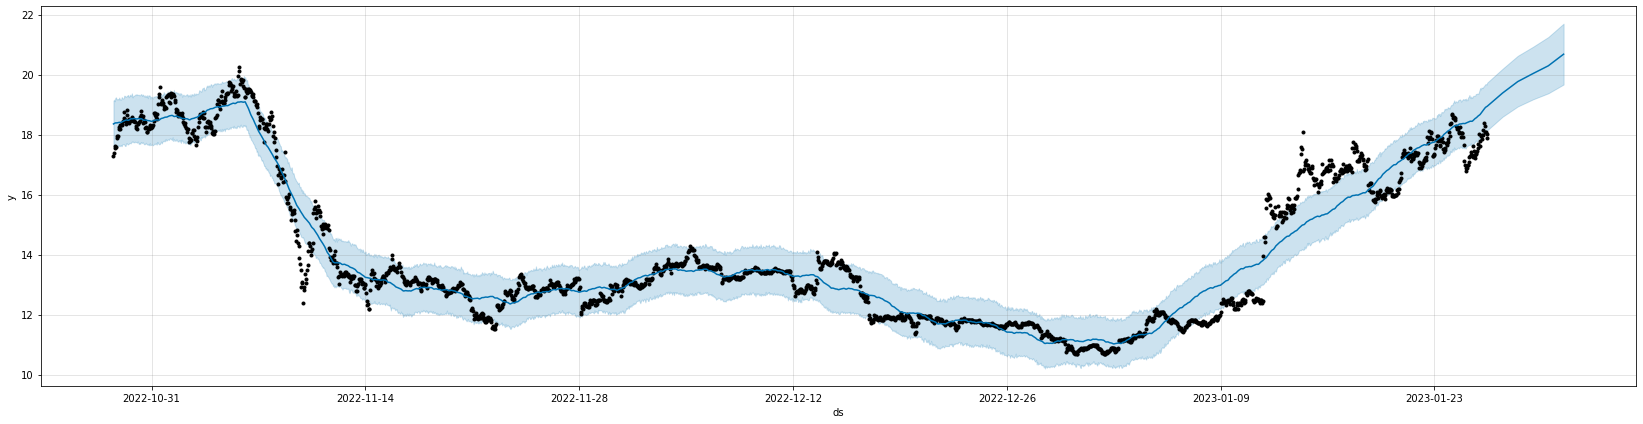

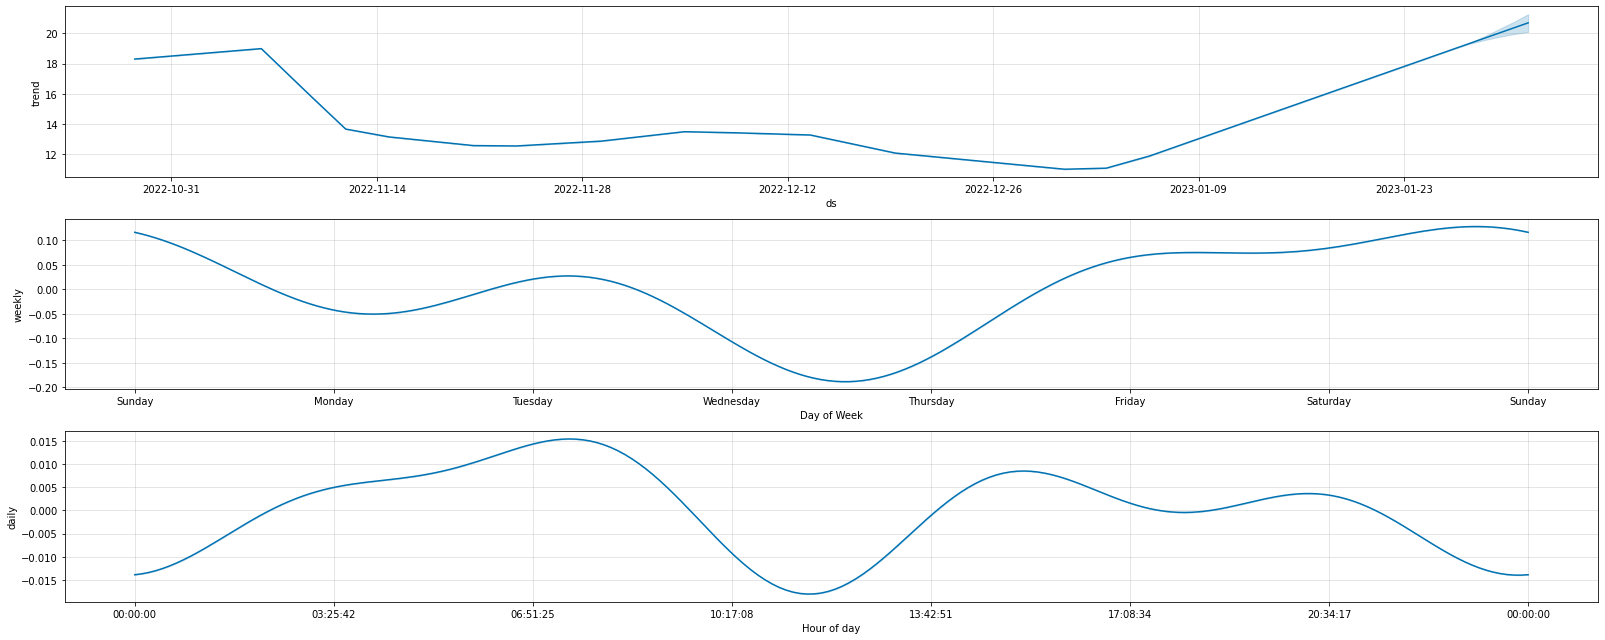

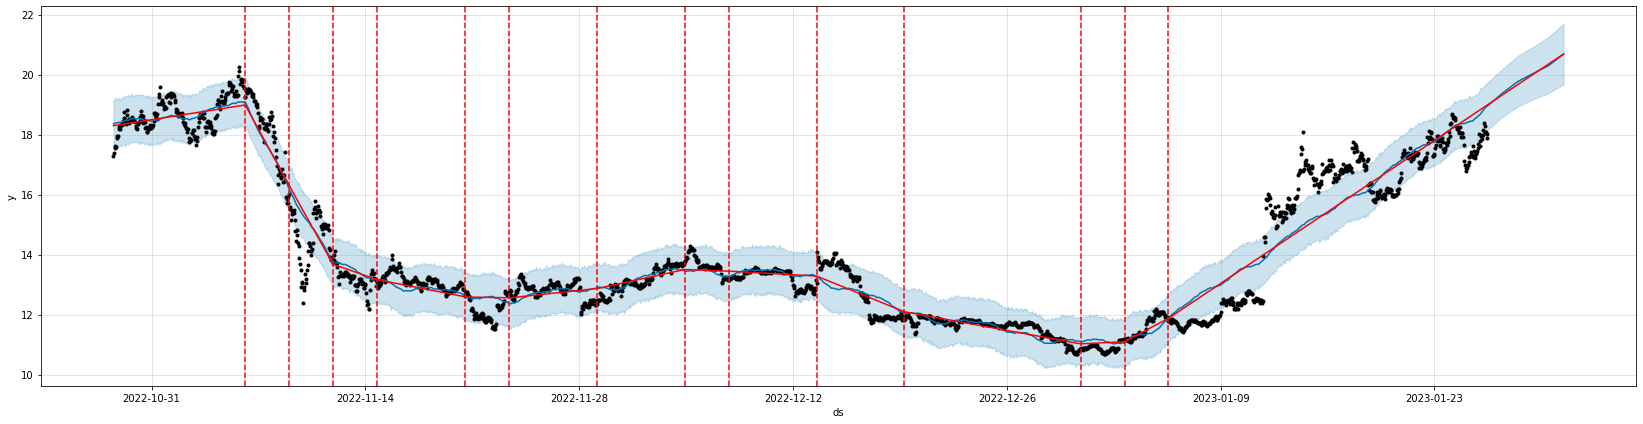

In [13]:
prophet_model(PAIR_DIC["AVAX"][1])